Optimal Transport with Linear Programming
=========================================

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

This numerical tours details how to solve the discrete optimal transport
problem (in the case of measures that are sums of Diracs) using linear
programming.

You need to install [CVXPY](https://www.cvxpy.org/). _Warning:_ seems to not be working on Python 3.7, use rather 3.6.

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import copy

Optimal Transport of Discrete Distributions
------------------------------------------

We consider two dicretes distributions
$$ \al = \sum_{i=1}^n a_i \de_{x_i} \qandq 
   \be = \sum_{j=1}^m b_j \de_{y_j}. $$
   
where $n,m$ are the number of points, $\de_x$ is the Dirac at
location $x \in \RR^d$, and $(x_i)_i, (y_j)_j$ are the positions of the diracs in $\RR^d$. 

Dimensions $(n,m)$ of the coulds.

In [51]:
n = 60
m = 80

Generate the point clouds $X=(x_i)_i$ and $Y=(y_j)_j$.

In [52]:
gauss = lambda q,a,c: a*np.random.randn(2, q) + np.transpose(np.tile(c, (q,1)))
X = np.random.randn(2,n)*.3
Y = np.hstack((gauss(int(m/2),.5,[0,1.6]),np.hstack((gauss(int(m/4),.3,[-1,-1]),gauss(int(m/4),.3,[1,-1])))))

In [53]:
X = np.array([ [ 12,5], [12,6], [12,7], [11,5], [11,6], [11,7], [10,5], [10,6], [10,7], [9,6], [8,6],[7,6],[6,6] ,
             [5,6],[4,6],[3,6],[2,6],[1,6] , [7,5], [6,4], [5,3], [7,7], [6,8], [5,9], 
             [1,5], [2,4], [3,3], [2,3], [1,3], [0,3], [1,7], [2,8], [3,9], [2,9], [1,9], [0,9]    ])

Y = np.array([ [ 12,5], [12,6], [12,7], [11,5], [11,6], [11,7], [10,5], [10,6], [10,7], [9,6], [8,6],[7,6],[6,6] ,
             [5,6],[4,6],[3,6],[2,6],[1,6] ]) + np.array([6,0])
Y_second = np.array([ [13,5 ], [14,4], [15, 3] , [13,7], [14,8], [15,9], [6,5], [5,4], [4,4], [3,3], [6,7], [5,8],
                    [4,8 ], [3,9]])

Y = np.concatenate((Y,Y_second)) - np.array([4,0])
X = X.astype('float64')
Y = Y.astype('float64')
X = X + np.array([0,10])
n = len(X)
m = len(Y)
X = X.T
Y = Y.T
X[0,:],X[1,:] = copy.deepcopy(X[1,:]) ,copy.deepcopy(X[0,:])
Y[0,:],Y[1,:] = copy.deepcopy(Y[1,:]),copy.deepcopy(Y[0,:])

In [54]:
print(X.shape)
print(Y.shape)

(2, 36)
(2, 32)


Generate the weights $a,b$.

In [55]:
normalize = lambda a: a/np.sum(a)
a = normalize(np.random.rand(n, 1))
b = normalize(np.random.rand(m, 1))

Helper function for display of clouds.

In [56]:
myplot = lambda x,y,ms,col: plt.scatter(x,y, s=ms*20, edgecolors="k", c=col, linewidths=2)

In [57]:
print((np.min(Y[0,:])-2,np.max(Y[0,:])+2))
print((np.min(Y[1,:])-2,np.max(Y[1,:])+2))

(1.0, 11.0)
(-3.0, 16.0)


Display the point clouds.
The size of each dot is proportional to its probability density weight.

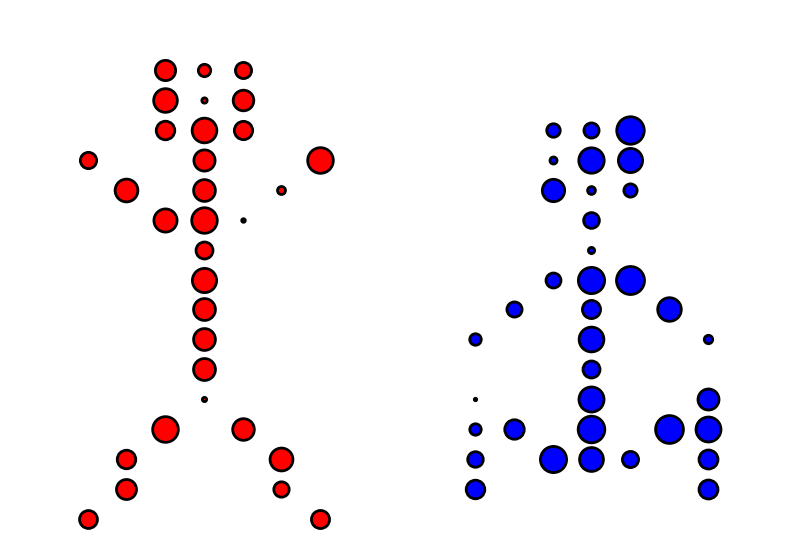

In [58]:
plt.figure(figsize = (10,7))
plt.axis("off")
for i in range(len(a)):
    myplot(X[0,i], X[1,i], a[i]*len(a)*10, 'b')
for j in range(len(b)):
    myplot(Y[0,j], Y[1,j], b[j]*len(b)*10, 'r')
plt.xlim(1,21)
plt.ylim(-2,16)
plt.show()

Compute the cost matrix $C_{i,j} := \norm{x_i-x_j}^2$.

In [59]:
def distmat(x,y):
    return np.sum(x**2,0)[:,None] + np.sum(y**2,0)[None,:] - 2*x.transpose().dot(y)
C = distmat(X,Y)

Define the optimiztion variable $P$.

In [60]:
P = cp.Variable((n,m))

Define the set of discrete couplings between $\al$ and $\be$
$$ U(a,b) := \enscond{ P \in \RR_+^{n \times m} }{
     \forall i, \sum_j P_{i,j} = a_i, \:
     \forall j, \sum_i P_{i,j} = b_j }. $$

In [61]:
u = np.ones((m,1))
v = np.ones((n,1))
U = [0 <= P, cp.matmul(P,u)==a, cp.matmul(P.T,v)==b]

The Kantorovitch formulation of the optimal transport reads
$$ P^\star \in \uargmin{P \in U(a,b)} \sum_{i,j} P_{i,j} C_{i,j}.  $$
Solve it using CVXPY

In [62]:
objective = cp.Minimize( cp.sum(cp.multiply(P,C)) )
prob = cp.Problem(objective, U)
result = prob.solve()

An optimal coupling $P^\star$ can be shown to be a sparse matrix
with less than $n+m-1$ non zero entries. An entry $P_{i,j}^\star \neq 0$
should be understood as a link between $x_{i}$
and $y_{j}$ where an amount of mass equal to $P_{i,j}^\star$ is transfered.

Check that the number of non-zero entries in $P^\star$ is $n+m-1$. Beware that we are using an interior point method here, so that entries of $P^\star$ are nevery exactly 0.

In [63]:
print("Number of non-zero: %d (n + m-1 = %d)" %(len(P.value[P.value>1e-5]), n + m-1))

Number of non-zero: 96 (n + m-1 = 67)


Display the solution coupling.

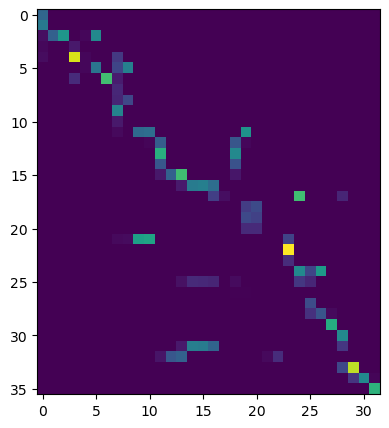

In [64]:
plt.figure(figsize = (5,5))
plt.imshow(P.value);

Display the connexion defined by the optimal coupling.

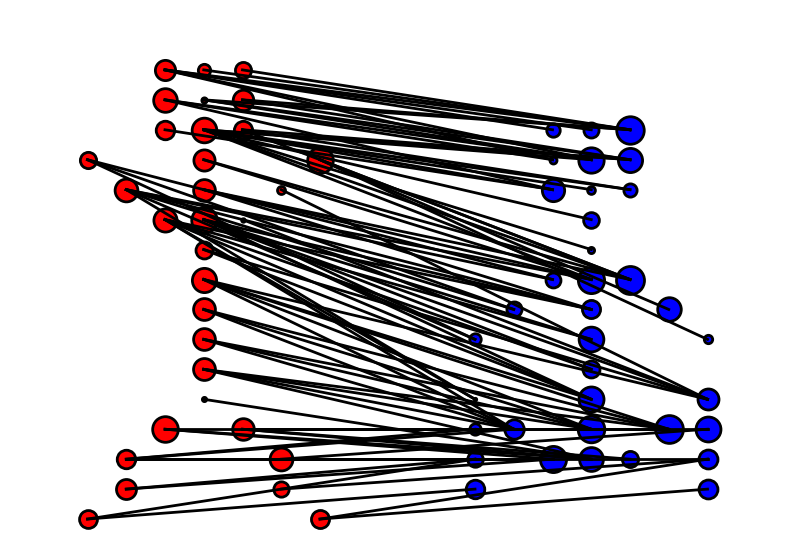

In [65]:
I,J = np.nonzero(P.value>1e-5)
plt.figure(figsize = (10,7))
plt.axis('off')
for k in range(len(I)):
    h = plt.plot(np.hstack((X[0,I[k]],Y[0,J[k]])),np.hstack(([X[1,I[k]], Y[1,J[k]]])),'k', lw = 2)
for i in range(len(a)):
    myplot(X[0,i], X[1,i], a[i]*len(a)*10, 'b')
for j in range(len(b)):
    myplot(Y[0,j], Y[1,j], b[j]*len(b)*10, 'r')
plt.xlim(1,21)
plt.ylim(-2,16)
plt.show()

Displacement Interpolation
--------------------------
For any $t \in [0,1]$, one can define a distribution $\mu_t$ such
that $t \mapsto \mu_t$ defines a geodesic for the Wasserstein metric.


Since the $W_2$ distance is a geodesic distance, this geodesic path solves the
following variational problem

$$ \mu_t = \uargmin{\mu} (1-t)W_2(\al,\mu)^2 + t W_2(\be,\mu)^2. $$
This can be understood as a generalization of the usual Euclidean
barycenter to barycenter of distribution. Indeed, in the case that
$\al = \de_{x}$ and $\be=\de_y$, one has $\mu_t=\de_{x_t}$ where $ x_t =
(1-t)x+t y $.


Once the optimal coupling $P^\star$ has been computed, the
interpolated distribution is obtained as

$$ \mu_t = \sum_{i,j} P^\star_{i,j} \de_{(1-t)x_{i} + t y_{j}}. $$

Find the $i,j$ with non-zero $P_{i,j}^\star$.

In [66]:
I,J = np.nonzero(P.value>1e-5)
Pij = P.value[I,J]

Display the evolution of $\mu_t$ for a varying value of $t \in [0,1]$.

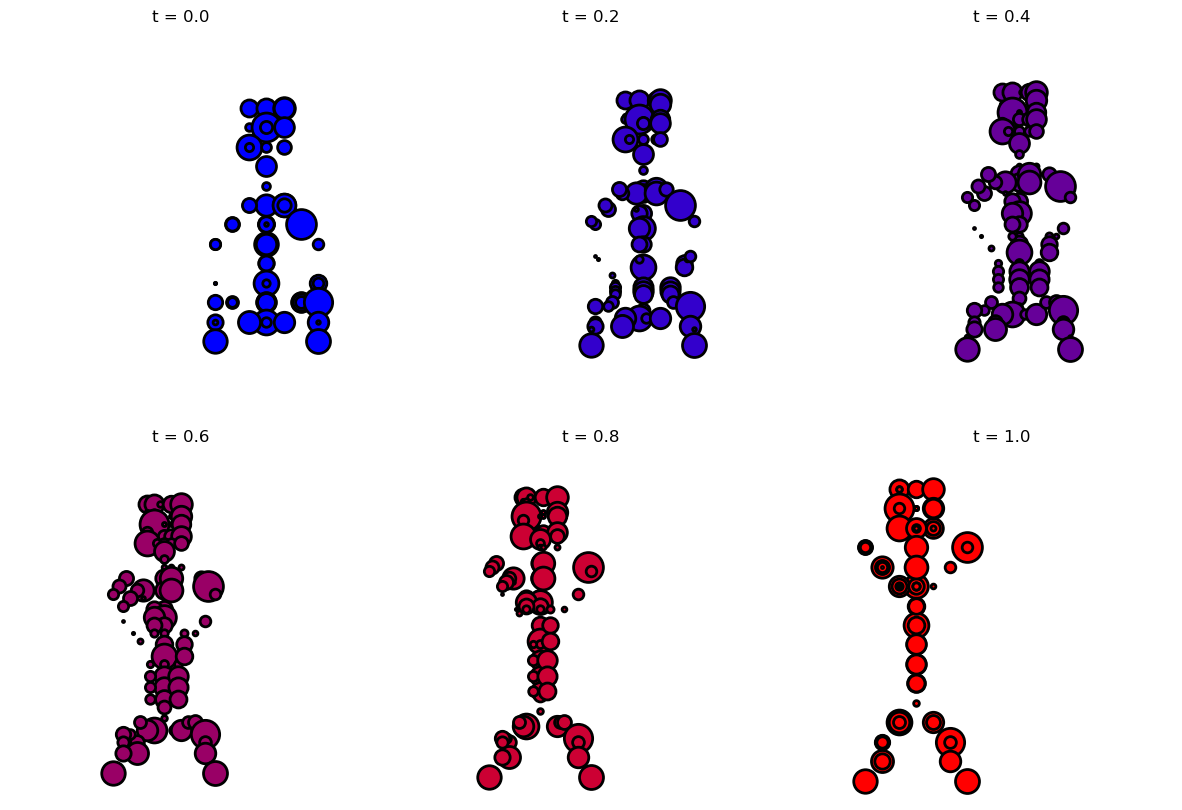

In [67]:
plt.figure(figsize =(15,10))
tlist = np.linspace(0, 1, 6)
for i in range(len(tlist)):
    t = tlist[i]
    Xt = (1-t)*X[:,I] + t*Y[:,J]
    plt.subplot(2,3,i+1)
    plt.axis("off")
    for j in range(len(Pij)):
        myplot(Xt[0,j],Xt[1,j],Pij[j]*len(Pij)*6,[[t,0,1-t]])
    plt.title("t = %.1f" %t) 
    plt.xlim(1,21)
    plt.ylim(-2,16)
plt.show()

Optimal Assignement
-------------------
In the case where $n=m$ and the weights are uniform $a_{i}=1/n, b_{j}=1/n$, one can show that there is at least one optimal transport coupling which is actually a
permutation matrix. This properties comes from the fact that
the extremal point of the polytope $U(1,1)$ are permutation matrices.


This means that there exists an optimal permutation $\si^\star \in \Sigma_n$ such
that
$$ P^\star_{i,j} = \choice{
      1 \qifq j=\si^\star(i), \\
      0 \quad\text{otherwise}.
  } $$
  
where $\Si_n$ is the set of permutation (bijections) of
$\{1,\ldots,n\}$.


This permutation thus solves the so-called optimal assignement problem
$$ \si^\star \in \uargmin{\si \in \Sigma_n}
      \sum_{i} C_{i,\si(j)}. $$

Use the same number of points.

In [68]:
#n = 40
#m = n

Compute points clouds.

In [69]:
#X = np.random.randn(2,n)*.3
#Y = np.hstack((gauss(int(m/2),.5,[0,1.6]),np.hstack((gauss(int(m/4),.3,[-1,-1]),gauss(int(m/4),.3,[1,-1])))))

In [70]:
X = np.array([ [ 12,5], [12,6], [12,7], [11,5], [11,7], [10,5], [10,6], [10,7], [9,6], [8,6],[7,6],[6,6] ,
             [5,6],[4,6],[3,6],[2,6], [7,5], [6,4], [5,3], [7,7], [6,8], [5,9], 
             [1,5], [2,4], [2,3], [1,3], [0,3], [1,7], [2,8], [2,9], [1,9], [0,9]    ])

Y = np.array([ [ 12,5], [12,6], [12,7], [11,5], [11,6], [11,7], [10,5], [10,6], [10,7], [9,6], [8,6],[7,6],[6,6] ,
             [5,6],[4,6],[3,6],[2,6],[1,6] ]) + np.array([6,0])
Y_second = np.array([ [13,5 ], [14,4], [15, 3] , [13,7], [14,8], [15,9], [6,5], [5,4], [4,4], [3,3], [6,7], [5,8],
                    [4,8 ], [3,9]])

Y = np.concatenate((Y,Y_second)) - np.array([4,0])

X = X.astype('float64')
Y = Y.astype('float64')
X = X + np.array([0,10])
n = len(X)
m = len(Y)
X = X.T
Y = Y.T
X[0,:],X[1,:] = copy.deepcopy(X[1,:]) ,copy.deepcopy(X[0,:])
Y[0,:],Y[1,:] = copy.deepcopy(Y[1,:]),copy.deepcopy(Y[0,:])

X += np.random.randn(2,n)*.01
Y += np.random.randn(2,n)*.01

Constant distributions.

In [71]:
a = np.ones([n,1])/n
b = a

Compute the weight matrix $ (C_{i,j})_{i,j}. $

In [72]:
C = distmat(X,Y)

Display the coulds.

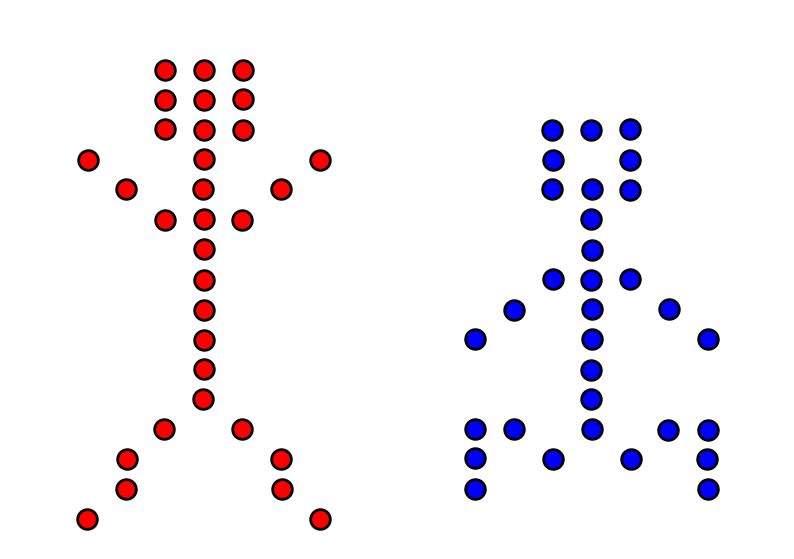

In [73]:
plt.figure(figsize = (10,7))
plt.axis('off')
myplot(X[0,:],X[1,:],10,'b')
myplot(Y[0,:],Y[1,:],10,'r')
plt.xlim(1,21)
plt.ylim(-2,16)
plt.show()

Solve the optimal transport.

In [74]:
P = cp.Variable((n,m))
u = np.ones((m,1))
v = np.ones((n,1))
U = [0 <= P, cp.matmul(P,u)==a, cp.matmul(P.T,v)==b]
objective = cp.Minimize( cp.sum(cp.multiply(P,C)) )
prob = cp.Problem(objective, U)
result = prob.solve()

Show that $P$ is a binary permutation matrix.

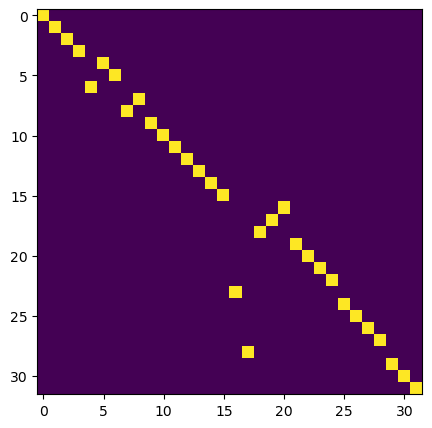

In [75]:
plt.figure(figsize = (5,5))
plt.imshow(P.value);

Display the optimal assignement.

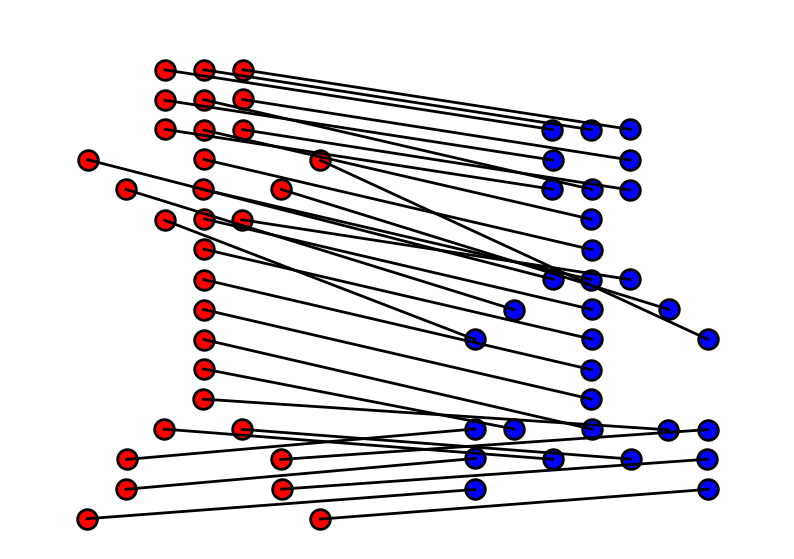

In [76]:
I,J = np.nonzero(P.value>1e-5)
plt.figure(figsize = (10,7))
plt.axis('off')
for k in range(len(I)):
    h = plt.plot(np.hstack((X[0,I[k]],Y[0,J[k]])),np.hstack(([X[1,I[k]], Y[1,J[k]]])),'k', lw = 2)
myplot(X[0,:], X[1,:], 10, 'b')
myplot(Y[0,:], Y[1,:], 10, 'r')
plt.xlim(1,21)
plt.ylim(-2,16)
plt.show()